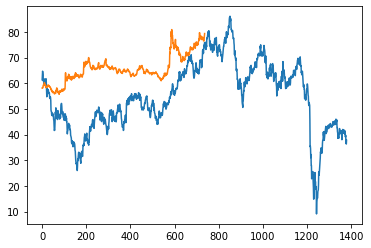

In [56]:
import pandas as pd
usd = pd.read_excel('USD_RATE.xlsx')
oil = pd.read_excel('BRENT_OIL.xls')
oil.price.plot()
usd.curs.plot()

In [57]:
df = usd.set_index('date').join(oil.set_index('date'))
df[df['price'].isna() == True]
df.fillna(method='ffill', inplace=True)
df.drop(['nominal', 'cdx'], axis=1, inplace=True)
df.reset_index(inplace=True)
pd.to_datetime(df.date, infer_datetime_format=True)
print(df.head())

        date     curs  price
0 2017-11-01  58.1179  60.98
1 2017-11-02  58.1557  60.79
2 2017-11-03  58.0869  61.42
3 2017-11-04  58.4296  61.42
4 2017-11-08  58.4557  63.96


In [59]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.dayofweek
print(df.head())

        date     curs  price  year  month  weekday
0 2017-11-01  58.1179  60.98  2017     11        2
1 2017-11-02  58.1557  60.79  2017     11        3
2 2017-11-03  58.0869  61.42  2017     11        4
3 2017-11-04  58.4296  61.42  2017     11        5
4 2017-11-08  58.4557  63.96  2017     11        2


In [61]:
past_days = 7
for day in range(past_days):
    n = day + 1
    df[f'curs_lag_{n}'] = df['curs'].shift(n)
    df[f'oil_lag_{n}'] = df['price'].shift(n)
    df[f'mult_{n}'] = df[f'curs_lag_{n}'] * df[f'oil_lag_{n}']
df['usd_mean_week'] = df['curs'].shift(1).rolling(window=7).mean()
df['oil_mean_week'] = df['price'].shift(1).rolling(window=7).mean()
df = pd.get_dummies(df, columns=['year', 'month', 'weekday'])
print(df.head(8))

        date     curs  price  year  month  weekday  curs_lag_1  oil_lag_1  \
0 2017-11-01  58.1179  60.98  2017     11        2         NaN        NaN   
1 2017-11-02  58.1557  60.79  2017     11        3     58.1179      60.98   
2 2017-11-03  58.0869  61.42  2017     11        4     58.1557      60.79   
3 2017-11-04  58.4296  61.42  2017     11        5     58.0869      61.42   
4 2017-11-08  58.4557  63.96  2017     11        2     58.4296      61.42   
5 2017-11-09  59.2480  64.49  2017     11        3     58.4557      63.96   
6 2017-11-10  59.2527  64.35  2017     11        4     59.2480      64.49   
7 2017-11-11  59.2808  64.35  2017     11        5     59.2527      64.35   

        mult_1  curs_lag_2  ...  oil_lag_5       mult_5  curs_lag_6  \
0          NaN         NaN  ...        NaN          NaN         NaN   
1  3544.029542         NaN  ...        NaN          NaN         NaN   
2  3535.285003     58.1179  ...        NaN          NaN         NaN   
3  3567.697398     58.

In [79]:
df_ready = df[7:].drop('date', axis=1)
X_train = df_ready.drop('curs', axis=1)[:-20]
y_train = df_ready.curs[:-20]
X_test = df_ready.drop('curs', axis=1)[-20:]
y_test = df.curs[-20:]
print(f'{len(X_train)}   {len(y_train)}')

710   710


In [66]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, LassoLarsCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [107]:
def get_prediction(x, name=''):
    print(name)
    x.fit(X_train, y_train)
    prediction = x.predict(X_test)
    print(f'mae = {mean_absolute_error(y_test, prediction)}\n')
    #print(f'\nprediction = \n{prediction}')
    #print(f'\nreal values = \n{y_test.values}')
    #print('\ncolumn coefs = ')
    #print(pd.DataFrame(data=x.coef_, index=X_train.columns).sort_values(0, axis=0))

In [109]:
get_prediction(LinearRegression(), 'LinearRegression()')
get_prediction(RandomForestRegressor(), 'RandomForestRegressor()')
get_prediction(LassoLarsCV(), 'LassoLarsCV()')
get_prediction(KNeighborsRegressor(), 'KNeighborsRegressor()')
get_prediction(MLPRegressor(), 'MLPRegressor()')

LinearRegression()
mae = 0.4136012723322963

RandomForestRegressor()
mae = 0.5754656000000032

LassoLarsCV()
mae = 0.38106749323596534

KNeighborsRegressor()
mae = 3.0322959999999974

MLPRegressor()
mae = 3.4440442277331194

